In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import networkx as nx
from matplotlib import pyplot as plt




In [10]:
filename = "../data/info_rw.json"

# Real World Networks


In [3]:
G = nx.read_weighted_edgelist(f'../data/RW.weighted.edgelist')

In [12]:
N = len(G.nodes)
L = len(G.edges)
weights = sorted([G.edges[edge]['weight'] for edge in G.edges()], reverse=True)
density = nx.density(G)
print(N,L)
print(density)

12966 106799
0.0012706286500056899


Text(0, 0.5, 'cumulative number of edges')

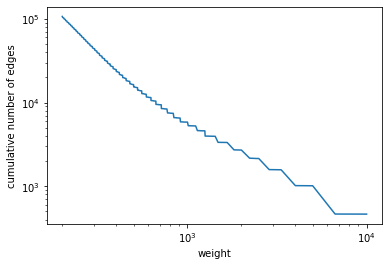

In [13]:

weightsCount = collections.Counter(weights)
w, cnt = zip(*weightsCount.items())
cumcount = [0]
for i, c in enumerate(cnt):
    cumcount.append(c + cumcount[-1])
cumcount = cumcount[1:]
plt.plot(w, cumcount, linestyle = '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('weight')
plt.ylabel('cumulative number of edges')


In [14]:
data = dict()
data['name'] = 'Trip Advisor'
data['N_nodes'] = N
data['N_edges'] = L
data['density'] = density

with open(filename,'w') as jf:
    json.dump(data,jf)

## Degree distribution analysis


In [15]:
degrees = [(n,d) for n, d in G.degree()]

In [16]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['degrees'] = degrees

with open(filename,'w') as jf:
    json.dump(data,jf)

## Connected components analysis


In [4]:
components =  [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
avg_size = np.average([len(c) for c in components[1:]])
print('average componets size: ', avg_size)
print(len(components))
print([len(c) for c in components[:20]],'etc...')

average componets size:  2.728
126
[12625, 21, 11, 11, 7, 7, 7, 6, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3] etc...


In [18]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['components'] = [len(c) for c in components]

with open(filename,'w') as jf:
    json.dump(data,jf)

In [5]:
C = G.subgraph(components[1])


In [15]:
all_pairs = nx.floyd_warshall(C, None)

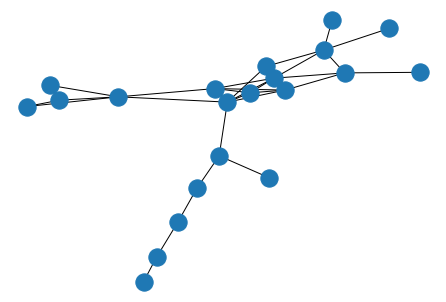

In [17]:
nx.draw(C)

In [16]:
sum([sum(t.values()) for t in all_pairs.values()]) / (21*20)

3.3142857142857145

In [18]:
max([max(t.values()) for t in all_pairs.values()])

8.0

## Path analysis


In [7]:
for edge in G.edges():
    G.edges[edge]['dissimilarity'] = 10000 - G.edges[edge]['weight']

In [21]:
avg_shortest_path_lenght = nx.average_shortest_path_length(C,weight=None)
with open(filename,'r') as jf:
    data = json.load(jf)

data['avg_shortest_path_lenght'] = avg_shortest_path_lenght

with open(filename,'w') as jf:
    json.dump(data,jf)

KeyboardInterrupt: 

In [ ]:
weighted_avg_shortest_path_lenght = nx.average_shortest_path_length(C,weight='dissimilarity')
with open(filename,'r') as jf:
    data = json.load(jf)

data['weighted_avg_shortest_path_lenght'] = weighted_avg_shortest_path_lenght

with open(filename,'w') as jf:
    json.dump(data,jf)

In [ ]:
diameter = nx.diameter(C,weight=None)
with open(filename,'r') as jf:
    data = json.load(jf)

data['diameter'] = diameter
with open(filename,'w') as jf:
    json.dump(data,jf)

In [ ]:
weighted_diameter = nx.diameter(C,weight='dissimilarity')
with open(filename,'r') as jf:
    data = json.load(jf)

data['weighted_diameter'] = weighted_diameter
with open(filename,'w') as jf:
    json.dump(data,jf)

In [ ]:
w_shortest_sum = 0
shortest_sum = 0
divider = 0

diameter = 0
w_diameter = 0

for i,node_i in enumerate(G.nodes()):
    for node_j in list(G.nodes())[i+1:]:
        w_dist =  nx.shortest_path_lenght(node_i, node_j, weight='dissimilarity')
        dist =  nx.shortest_path_lenght(node_i, node_j, weight=None)
        
        divider += 1 
        
        w_shortest_sum += w_dist
        shortest_sum += dist
        
        if dist > diameter : diameter = dist 
        if w_dist > w_diameter : w_diameter = w_dist
        

## Clustering Coefficient, Density analysis


In [ ]:
clusterings = [(n,d) for n,d in nx.clustering(G)]

with open(filename,'r') as jf:
    data = json.load(jf)

data['clusterings'] =clusterings 

with open(filename,'w') as jf:
    json.dump(data,jf)

## Centrality analysis

In [ ]:
import pandas as pd
df = pd.read_csv("../../data/tuscany.csv")

for node in G.nodes():
    G.nodes[node]['name'] = df.loc[int(node),'name']

In [ ]:
def plot_kcentral(G,dictionary,k=10):
    sorted_dictionary =  sorted(dictionary, key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary.items())
    nodes = nodes[:k]
    values = values[:k]
    
    plt.bar(x, y)
    plt.xticks(rotation=45)

### Degree Centrality

In [ ]:
degree_centrality = nx.degree_centrality(G)

In [ ]:
with open(filename,'r') as jf:
    data = json.load(jf)

data['degree_centrality'] = degree_centrality 

with open(filename,'w') as jf:
    json.dump(data,jf)